My target is visualize the number of crimes,such as the number for a year,a month ,especially visualization on map.

If you like this kernel,upvoting it.

Your upvoting is my motivation


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
import os 
import time
#from matplotlib import cm
import pylab as pl

The variable include INCIDENT_NUMBER,OFFENSE_CODE,and so on.If you want to visualize the number of crimes on map ,
the variable of "Lat" and "Long" is very importent. First,we have to remove Na from Lat and Long.
OFFENSE_CODE_GROUP include the type of crime.

In [24]:
data=pd.read_csv("./data/crimedata.csv")
data=data.loc[(data['Lat']>35)&(data['Long']< -60)] #remove NA from 'Lat' and 'Long'
data=data.dropna(subset=["STREET"])
columns=['OFFENSE_CODE_GROUP','YEAR']
for j in columns:
    print(j,data[j].unique())



/Users/Ann/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


OFFENSE_CODE_GROUP ['Auto Theft' 'Investigate Property' 'Investigate Person' 'Vandalism'
 'Verbal Disputes' 'Motor Vehicle Accident Response' 'Aggravated Assault'
 'Residential Burglary' 'Larceny' 'Firearm Violations'
 'Medical Assistance' 'Simple Assault' 'Missing Person Reported' 'Robbery'
 'Property Lost' 'Violations' 'Firearm Discovery' 'Warrant Arrests'
 'Other' 'Ballistics' 'Towed' 'Drug Violation' 'Fire Related Reports'
 'Fraud' 'Disorderly Conduct' 'Larceny From Motor Vehicle'
 'Police Service Incidents' 'Missing Person Located' 'Harassment'
 'Property Found' 'Liquor Violation' 'Property Related Damage'
 'Confidence Games' 'Commercial Burglary' 'Recovered Stolen Property'
 'Other Burglary' 'Assembly or Gathering Violations' 'Counterfeiting'
 'Prisoner Related Incidents' 'License Plate Related Incidents'
 'Restraining Order Violations' 'Search Warrants' 'License Violation'
 'Landlord/Tenant Disputes' 'Auto Theft Recovery'
 'Operating Under the Influence' 'Evading Fare' 'Embezzle

The variable of SHOOTING,DISTRICT,and UCR_PART have missing value. But we do not use these variable in this code.If you use these variable ,you have to watch out missing value.

In [6]:
print(data.isnull().sum())

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                   29
REPORTING_AREA              0
SHOOTING               394646
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                  109
STREET                      0
Lat                         0
Long                        0
Location                    0
dtype: int64


In [29]:
type={label: idx for idx, label in enumerate(np.unique(data['OFFENSE_CODE_GROUP']))}
data['type']=data['OFFENSE_CODE_GROUP'].map(type) #change crime type to number
print(type)
index=pd.Index(data['type'])
print(index.value_counts().sort_values()[-3:])

{'Aggravated Assault': 0, 'Aircraft': 1, 'Arson': 2, 'Assembly or Gathering Violations': 3, 'Auto Theft': 4, 'Auto Theft Recovery': 5, 'Ballistics': 6, 'Biological Threat': 7, 'Bomb Hoax': 8, 'Burglary - No Property Taken': 9, 'Commercial Burglary': 10, 'Confidence Games': 11, 'Counterfeiting': 12, 'Criminal Harassment': 13, 'Disorderly Conduct': 14, 'Drug Violation': 15, 'Embezzlement': 16, 'Evading Fare': 17, 'Explosives': 18, 'Fire Related Reports': 19, 'Firearm Discovery': 20, 'Firearm Violations': 21, 'Fraud': 22, 'Gambling': 23, 'HOME INVASION': 24, 'HUMAN TRAFFICKING': 25, 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE': 26, 'Harassment': 27, 'Harbor Related Incidents': 28, 'Homicide': 29, 'INVESTIGATE PERSON': 30, 'Investigate Person': 31, 'Investigate Property': 32, 'Landlord/Tenant Disputes': 33, 'Larceny': 34, 'Larceny From Motor Vehicle': 35, 'License Plate Related Incidents': 36, 'License Violation': 37, 'Liquor Violation': 38, 'Manslaughter': 39, 'Medical Assistance': 40, 'Mi

The number of crimes top 3 respectively is 'Motor Vehicle Accident Response',
'Larceny',and 'Medical Assistance''.

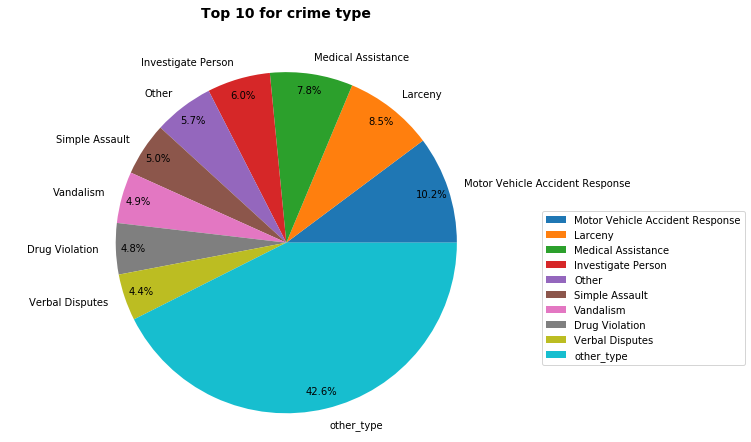

In [8]:
count=data['OFFENSE_CODE_GROUP'].value_counts()
groups=list(data['OFFENSE_CODE_GROUP'].value_counts().index)[:9]
counts=list(count[:9])
counts.append(count.agg(sum)-count[:9].agg('sum'))

groups.append('other_type')
type_dict={"group":groups,
          "counts":counts}
type_dict=pd.DataFrame(type_dict)
qx = type_dict.plot(kind='pie', figsize=(10,7), y='counts', labels=groups,
             autopct='%1.1f%%', pctdistance=0.9, radius=1.2)
plt.legend(loc=0, bbox_to_anchor=(0.95,0.6)) 

plt.title('Top 10 for crime type', weight='bold', size=14,y=1.08)
plt.axis('equal')
plt.ylabel('')
plt.show()
plt.clf()
plt.close()

In [9]:
print(data['OFFENSE_CODE_GROUP'].value_counts())

Motor Vehicle Accident Response              40471
Larceny                                      33610
Medical Assistance                           31105
Investigate Person                           23695
Other                                        22575
Simple Assault                               20002
Vandalism                                    19376
Drug Violation                               19205
Verbal Disputes                              17538
Investigate Property                         14395
Towed                                        14179
Larceny From Motor Vehicle                   13133
Property Lost                                12780
Warrant Arrests                               9913
Aggravated Assault                            9875
Fraud                                         8070
Missing Person Located                        7146
Residential Burglary                          6857
Violations                                    6558
Auto Theft                     

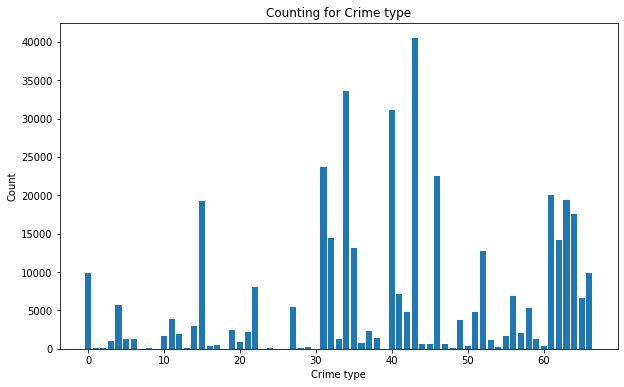

In [30]:
plt.figure(figsize = (10,6))
plt.bar(index.value_counts().index,index.value_counts())
plt.xlabel("Crime type")
plt.ylabel("Count")
plt.title("Counting for Crime type")
plt.show()


Because the data is collected from 2015-06 to 2018-09, the number of crimes in 2015 and 2018 is less than 2016 and 2017

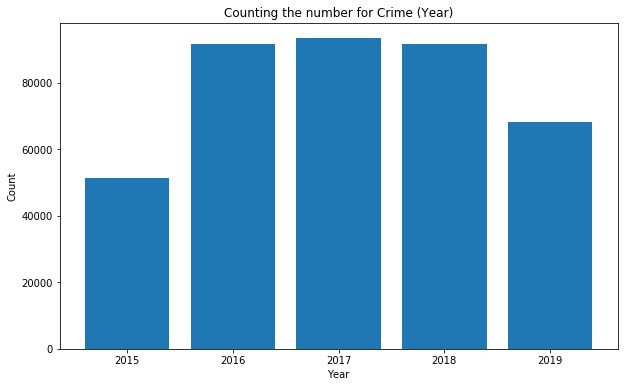

In [33]:
Crime_year=pd.Index(data['YEAR'])
ax =figure(figsize = (10,6)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.bar(Crime_year.value_counts().index,Crime_year.value_counts())
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Counting the number for Crime (Year)")
plt.show()


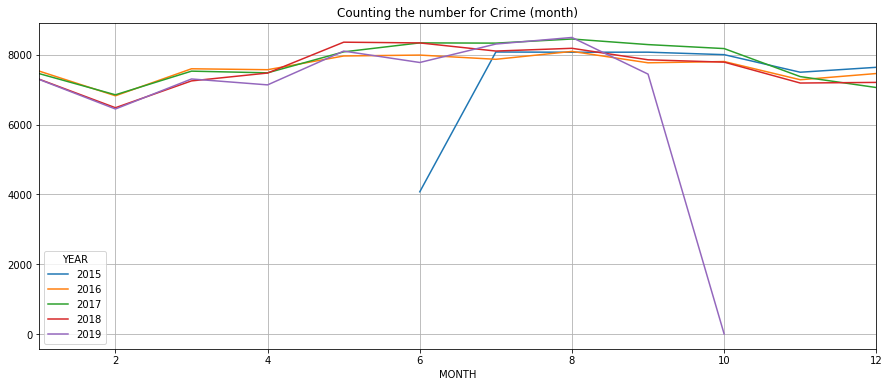

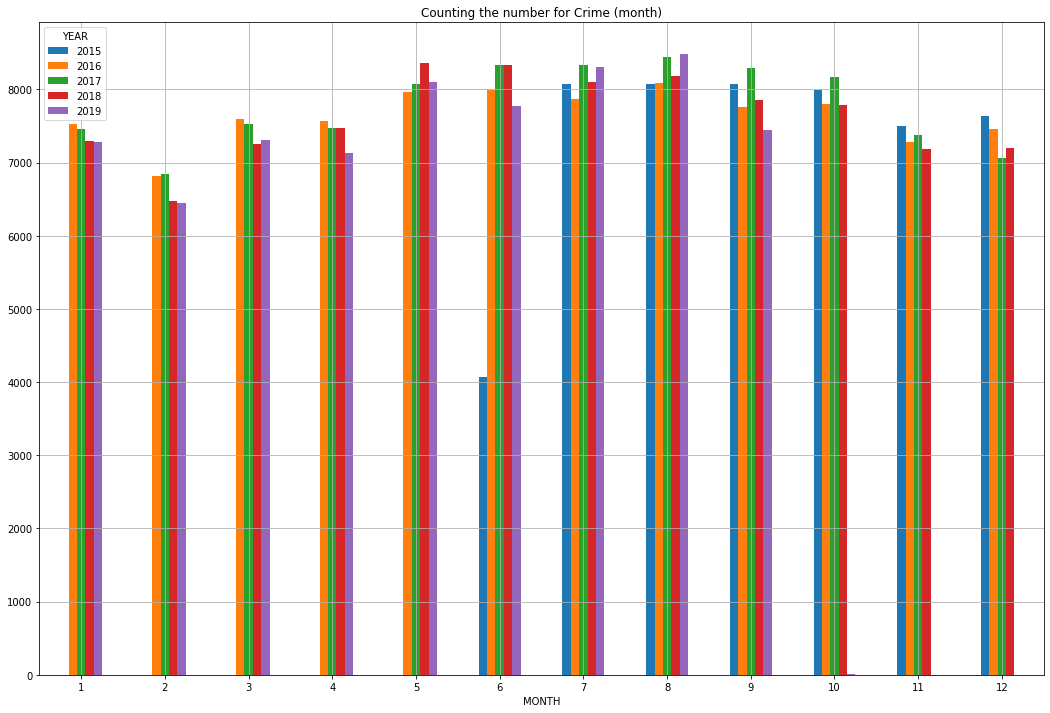

In [12]:

data.groupby(['YEAR','MONTH'])['OFFENSE_CODE_GROUP'].agg('count').unstack('YEAR')
fig,ax=plt.subplots(figsize=(15,6))
data.groupby(['MONTH','YEAR'])['OFFENSE_CODE_GROUP'].agg('count').unstack().plot(ax=ax)
plt.title("Counting the number for Crime (month)")
plt.grid(True)

data.groupby(['YEAR','MONTH'])['OFFENSE_CODE_GROUP'].agg('count').unstack('YEAR')
fig,ax=plt.subplots(figsize=(18,12))
data.groupby(['MONTH','YEAR'])['OFFENSE_CODE_GROUP'].agg('count').unstack().plot(kind='bar',ax=ax)
pl.xticks(rotation=360)
plt.title("Counting the number for Crime (month)")
plt.grid(True)

I use the top 2000 data to visualize the information of crime for 2015-2018 on map. Because it cannot visualize in kaggle if the data too much.
But you can use your python to complete for all data.Use this code "boston_map.save(filename+".html")"to save your map to be html."filename" you can define by yourself.

In [16]:
import geopandas as gpd
import folium
incidents=folium.map.FeatureGroup()

#for lat,lon, in zip(data.Lat,data.Long):
#incidents.add_child(folium.CircleMarker([lat,lon],radius=7,color='yellow',fill=True,fill_color='red',fill_opacity=0.4))

Lat=42.3
Lon=-71.1
#boston_map=folium.Map([Lat,Lon],zoom_start=12)
#boston_map.add_child(incidents)
#boston_map.save("mymap.html")

from folium import plugins

data1=data[data['YEAR']==2015][0:2000]
filename="Crime2015"
boston_map=folium.Map([Lat,Lon],zoom_start=12)
incidents2=plugins.MarkerCluster().add_to(boston_map)
for lat,lon,label in zip(data1.Lat,data1.Long,data1.OFFENSE_CODE_GROUP):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(incidents2)
boston_map.add_child(incidents2)
boston_map


In [17]:
data1=data[data['YEAR']==2016][0:2000]
filename="Crime2016"
boston_map=folium.Map([Lat,Lon],zoom_start=12)
incidents2=plugins.MarkerCluster().add_to(boston_map)
for lat,lon,label in zip(data1.Lat,data1.Long,data1.OFFENSE_CODE_GROUP):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(incidents2)
boston_map.add_child(incidents2)
boston_map

In [18]:
data1=data[data['YEAR']==2017][0:2000]
filename="Crime2017"
boston_map=folium.Map([Lat,Lon],zoom_start=12)
incidents2=plugins.MarkerCluster().add_to(boston_map)
for lat,lon,label in zip(data1.Lat,data1.Long,data1.OFFENSE_CODE_GROUP):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(incidents2)
boston_map.add_child(incidents2)
boston_map

In [19]:
data1=data[data['YEAR']==2018][0:2000]
filename="Crime2018"
boston_map=folium.Map([Lat,Lon],zoom_start=12)
incidents2=plugins.MarkerCluster().add_to(boston_map)
for lat,lon,label in zip(data1.Lat,data1.Long,data1.OFFENSE_CODE_GROUP):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(incidents2)
boston_map.add_child(incidents2)
boston_map

In [39]:
data1=data[data['YEAR']==2019][-2000:]
filename="Crime2019"
boston_map=folium.Map([Lat,Lon],zoom_start=12)
incidents2=plugins.MarkerCluster().add_to(boston_map)
for lat,lon,label in zip(data1.Lat,data1.Long,data1.OFFENSE_CODE_GROUP):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(incidents2)
boston_map.add_child(incidents2)
boston_map